## Agentic RAG
- Agentic RAG is a framework that enhances traditional RAG systems by **incorporating intelligent agents to handle complex tasks and make decisions dynamically**.
- Use an agent to figure out how to retrieve the most relevant information before using the retrieved information to answer the user's question.
- Retrieval Agents are useful when we want to make decisions about whether to retrieve from and index.
- To implement a retrieval agent, we simply need to give an LLM access to a retriever tool.

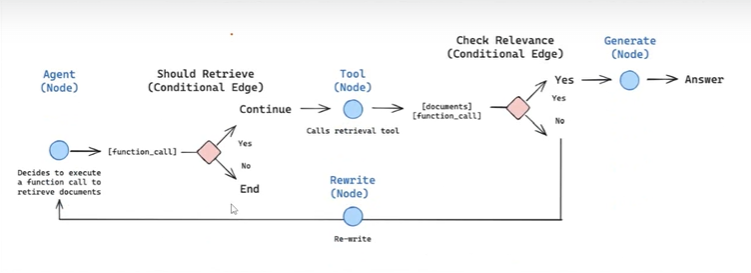

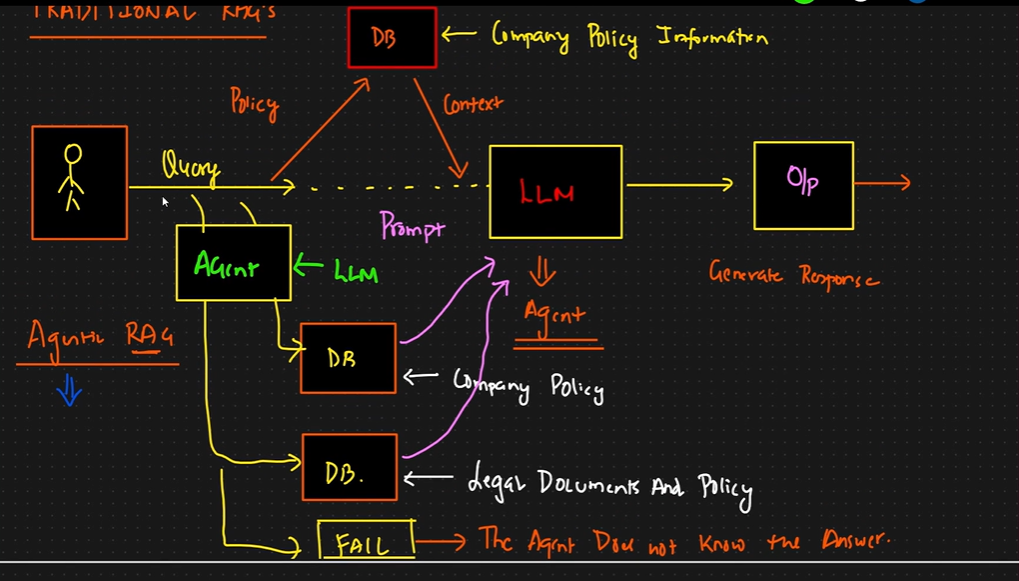

#### Usecase:
From the start we have a node which is like agent. and then from this agent it is basically connected to retrieve which is a vectordb. Our aim is whenever a user provides any query first, the agent should specifically go ahead and look for any retrieve vectordb that whether there is any specific content available or to probably get any kind of context that is available in the vectordb. Once we get that particular context, then the retrieve will be doing one more functionality based on the input query, we will try to check whether that particular context is good or bad. If it is bad, we will go ahead and rewrite that user query and send it back to the agent. Otherwise we will go ahead and generate the entire summary and give it to the user. The main part why saying Agentic RAG because in this retrieve, we will try to add two different kind of vectordb having different specific information.

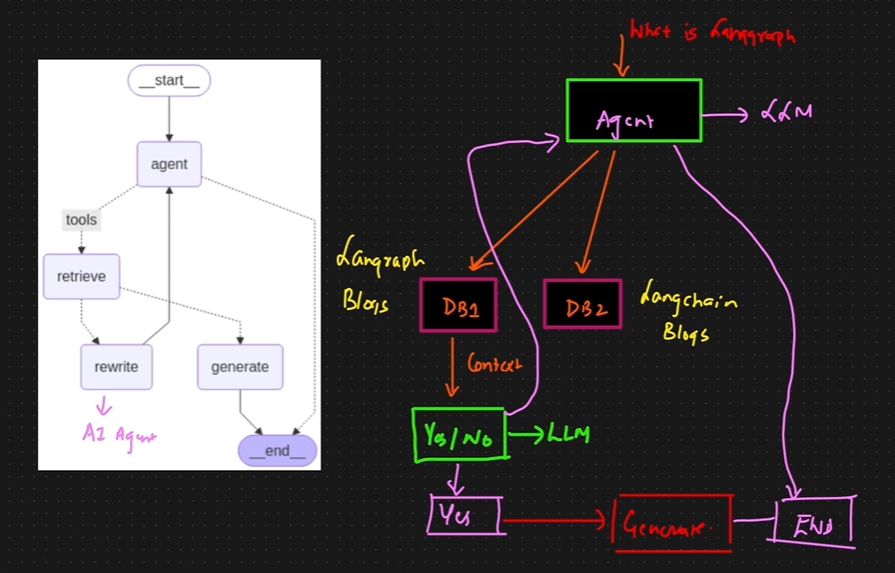

In [1]:
import os
from dotenv import load_dotenv
from langchain_groq import ChatGroq
load_dotenv()

os.environ['GROQ_API_KEY']=os.getenv('GROQ_API_KEY')

groq_llm=ChatGroq(model='llama-3.1-8b-instant')

vector db for langgraph

In [2]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

urls=[
    'https://langchain-ai.github.io/langgraph/tutorials/introduction/',
    'https://langchain-ai.github.io/langgraph/tutorials/workflows/',
    'https://langchain-ai.github.io/langgraph/how-tos/map-reduce/',
]

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [3]:
docs=[WebBaseLoader(url).load() for url in urls]
docs

[[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='\n\n\n\n\n\n\n\n\n\n\n\nWorkflows & agents\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nOur new LangChain Academy Course Deep Research with LangGraph is now live! Enroll for free.\n\n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Workflows & agents\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing s

In [4]:
doc_list=[item for sublist in docs for item in sublist]

text_splitter=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=100)
doc_split=text_splitter.split_documents(doc_list)
print(len(doc_split))

47


In [5]:
embedding_model_name = "BAAI/bge-small-en-v1.5"
embeddings = HuggingFaceEmbeddings(model_name=embedding_model_name)
vectorstore_langgraph=FAISS.from_documents(documents=doc_list,embedding=embeddings)

retriever_langgraph=vectorstore_langgraph.as_retriever()

C:\Users\srish\AppData\Local\Temp\ipykernel_7980\1178382126.py:2: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name=embedding_model_name)
c:\Users\srish\anaconda3\envs\p1env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
retriever_langgraph.invoke("what is langgraph")

[Document(id='9dc3d7a2-05d3-475b-a9bb-07abdcb27ad6', metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='\n\n\n\n\n\n\n\n\n\n\n\nWorkflows & agents\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nOur new LangChain Academy Course Deep Research with LangGraph is now live! Enroll for free.\n\n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Workflows & agents\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n\n\n          \n  \n  \n    \n  \n  Get started\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Guides

In [7]:
# need to convert retriever to retriever tools
from langchain.tools.retriever import create_retriever_tool

retriever_tool_langgraph=create_retriever_tool(
    retriever_langgraph,
    'retrievr_vector_db_blog', # name
    'Search and run information about langgraph' # description
)
retriever_tool_langgraph

Tool(name='retrievr_vector_db_blog', description='Search and run information about langgraph', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x00000251801C39C0>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x0000025180029A90>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x00000251F82D53A0>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x0000025180029A90>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_con

In [8]:
retriever_tool_langgraph.invoke('what is langgraph')

'\n\n\n\n\n\n\n\n\n\n\n\nWorkflows & agents\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nOur new LangChain Academy Course Deep Research with LangGraph is now live! Enroll for free.\n\n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Workflows & agents\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n\n\n          \n  \n  \n    \n  \n  Get started\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Guides\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Reference\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Examples\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Additional resources\n\n        \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n    LangGraph\n  \n\n\n\n\n\n\n    GitHub\n  

vector db for langchain

In [9]:
urls=[
    'https://python.langchain.com/docs/tutorials/',
    'https://python.langchain.com/docs/tutorials/chatbot/',
    'https://python.langchain.com/docs/tutorials/qa_chat_history/'
]

docs=[WebBaseLoader(url).load() for url in urls]
docs

[[Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | 🦜️🔗 LangChain', 'description': 'New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.', 'language': 'en'}, page_content='\n\n\n\n\nTutorials | 🦜️🔗 LangChain\n\n\n\n\n\n\n\n\nSkip to main contentOur new LangChain Academy Course Deep Research with LangGraph is now live! Enroll for free.IntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1💬SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engineBuild a Question/Answering system over SQ

In [10]:
doc_list=[item for sublist in docs for item in sublist]

text_splitter=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=100)
doc_split=text_splitter.split_documents(doc_list)

In [11]:
vectorstore_langchain=FAISS.from_documents(doc_split,embeddings)

retriever_langchain=vectorstore_langchain.as_retriever()

In [12]:
retriever_tool_langchain=create_retriever_tool(
    retriever_langchain,
    "retriever_vector_db_langchain_blog",
    "Search and run information about langchain"
)

In [13]:
retriever_tool_langchain.invoke('what is langchain')

'Tutorials | 🦜️🔗 LangChain\n\nQuickstart\u200b\nFirst up, let\'s learn how to use a language model by itself. LangChain supports many different language models that you can use interchangeably - select the one you want to use below!\n\nPipCondapip install langchain-core langgraph>0.2.27conda install langchain-core langgraph>0.2.27 -c conda-forge\nFor more details, see our Installation guide.\nLangSmith\u200b\nMany of the applications you build with LangChain will contain multiple steps with multiple invocations of LLM calls.\nAs these applications get more and more complex, it becomes crucial to be able to inspect what exactly is going on inside your chain or agent.\nThe best way to do this is with LangSmith.\nAfter you sign up at the link above, (you\'ll need to create an API key from the Settings -> API Keys page on the LangSmith website), make sure to set your environment variables to start logging traces:\nexport LANGSMITH_TRACING="true"export LANGSMITH_API_KEY="..."\nOr, if in a n

In [14]:
tools=[retriever_tool_langgraph,retriever_tool_langchain]

both vectordb tools are created, now let's create agent graph workflow

In [15]:
llm_with_tools=groq_llm.bind_tools(tools)

In [26]:
from typing_extensions import TypedDict,Literal
from typing import Annotated,Sequence
from langchain_core.messages import BaseMessage, HumanMessage
from langgraph.graph.message import add_messages
from pydantic import BaseModel,Field
from langchain_core.prompts import PromptTemplate
from langchain import hub
from langchain_core.output_parsers import StrOutputParser

class State(TypedDict):
    messages: Annotated[Sequence[BaseMessage],add_messages]

In [23]:
def agent(state:State):
    """
    Invokes the agent model to generate a response based on the current state. Given the question, it will decide to retrieve using the retriever tool, or simply end.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with the agent response appended to messages
    """
    print("-----Call Agent-----")
    message=state['messages']
    response=llm_with_tools.invoke(message)
    return {'messages':[response]}

def grade_doc(state:State)->Literal['generate','rewrite']:
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (messages): The curent state
    
    Returns:
        str: A decision for whether the documents are relevant or not
    """
    print("----Check Relevance----")

    # data model
    class grade(BaseModel):
        """Binary score for relevance check."""
        binary_score:str=Field(description="Relevance score 'yes' or 'no'")

    # LLM with structure
    llm_structure=groq_llm.with_structured_output(grade)

    prompt=PromptTemplate(
        template="""You are a grader assessing relevance of a retrived document to a user question.\n
         Here is the retrieved document: \n\n{context}\n\n
        Here is the user question: {question}\n
        If the document contains keywords or semantic meaning related to the user question, grade it as relevant.\n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=['context','question'],
    )

    chain=prompt|llm_structure
    messages=state['messages']
    last_message=messages[-1]

    question=messages[0].content
    docs=last_message.content

    scored_result=chain.invoke({'question':question,'context':docs})

    score=scored_result.binary_score

    if score=='yes':
        print('----Decision: docs relevant----')
        return 'generate'
    else:
        print('----Decision: docs not relevant----')
        return 'rewrite'

In [27]:
def generate(state:State):
    """
    Generate answer

    Args: 
        state (messages): The current state

    Returns:
        dict: The updated message
    """
    print("----Generate----")
    messages=state['messages']
    question=messages[0].content
    last_message=messages[-1]

    docs=last_message.content

    prompt=hub.pull('rlm/rag-prompt')

    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)
    
    rag_chain=prompt|groq_llm|StrOutputParser()

    response=rag_chain.invoke({'context':docs,'question':question})
    return {'messages':[response]}

def rewrite(state:State):
    """
    Transform the query to produce a better question.
    
    Args:
        state (messages): The current state
        
    Returns:
        dict: The updated state with re-phrased question
    """
    print("----Transform query----")
    messages=state['messages']
    question=messages[0].content

    msg=[
        HumanMessage(
            content=f'''\n
    Look at the input and try to reason about the underlying semantic intent / meaning. \n
    Here is tthe initial question:
    \n-------\n
    {question}
    \n------\n
    Formulate an improved question:
    ''',
        )
    ]

    response=groq_llm.invoke(msg)
    return {'messages':[response]}

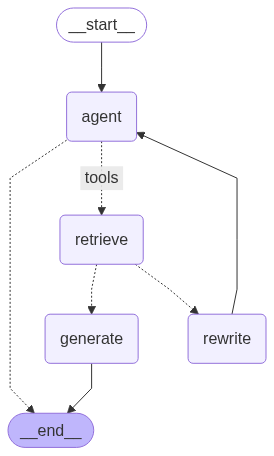

In [28]:
from langgraph.graph import StateGraph,START,END
from IPython.display import display,Image
from langgraph.prebuilt import tools_condition,ToolNode

graph=StateGraph(State)

graph.add_node('agent',agent)
graph.add_node('retrieve',ToolNode(tools)) 
graph.add_node('generate',generate)
graph.add_node('rewrite',rewrite)

graph.add_edge(START,'agent')
graph.add_conditional_edges('agent',tools_condition,{'tools':'retrieve',END:END})
graph.add_conditional_edges('retrieve',grade_doc)
graph.add_edge('generate',END)
graph.add_edge('rewrite','agent')

agent=graph.compile()

display(Image(agent.get_graph().draw_mermaid_png()))

In [31]:
agent.invoke({'messages':'what is langchain summary'})

-----Call Agent-----
----Check Relevance----
----Decision: docs relevant----
----Generate----


{'messages': [HumanMessage(content='what is langchain summary', additional_kwargs={}, response_metadata={}, id='bd46ff48-ab42-4cca-8856-6429f45039f4'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'ejs3zxya3', 'function': {'arguments': '{"query":"langchain summary"}', 'name': 'retriever_vector_db_langchain_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 312, 'total_tokens': 334, 'completion_time': 0.022666011, 'prompt_time': 0.022136268, 'queue_time': 0.049042172, 'total_time': 0.044802279}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_46fc01befd', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--0ad3d087-1f45-4c43-9f35-febea3f15dce-0', tool_calls=[{'name': 'retriever_vector_db_langchain_blog', 'args': {'query': 'langchain summary'}, 'id': 'ejs3zxya3', 'type': 'tool_call'}], usage_metadata={'input_tokens': 312, 'output_tokens': 22, 'total_tokens': 33

In [33]:
agent.invoke({'messages':'what is machine learning'})

-----Call Agent-----


{'messages': [HumanMessage(content='what is machine learning', additional_kwargs={}, response_metadata={}, id='f499fa0d-af37-495c-aa71-50b7cd0fc4dc'),
  AIMessage(content='I\'m not sure I can provide a complete definition of machine learning. Can I try to find some information on it first?\n\n<function=retrievr_vector_db_blog>{"query": "machine learning definition"}', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 311, 'total_tokens': 353, 'completion_time': 0.086281404, 'prompt_time': 0.023590828, 'queue_time': 0.045592189, 'total_time': 0.109872232}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_46fc01befd', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--a962f5b5-0021-41e4-abea-6d99b7eafa64-0', usage_metadata={'input_tokens': 311, 'output_tokens': 42, 'total_tokens': 353})]}

## Corrective RAG
- Corrective RAG (CRAG) is an advanced technique within Retrieval-Augmented Generation that focuses on improving the accuracy and relevance of generated response by incorporating mechanisms for self-reflection and self-grading of retrieved documents. 
- It does this by evaluating the quality of retrieved documents and applying corrective actions when necessary, such as refining or replacing incorrect retrievals.

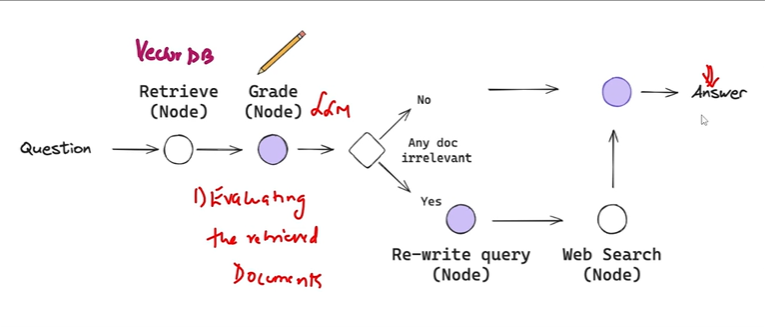

Traditional RAG systems rely heavily on the accuracy of retrieved documents. If the retrieved information is flawed or incomplete, the generated response can also be inaccurate.

#### CRAG's Core Components
1. **Retrieval Evaluator:** this component assesses the quality and relevance of retrieved documents.
2. **Generative Model:** this model generates the initial response based on the retrieved information.
3. **Refinement and Correction:** CRAG employs strategies like knowledge refinement or web search to address issues identified by the retrieval evaluator.

#### Benefits of CRAG
- Improved Accuracy: by evaluating and correcting retrieved information, CRAG helps ensure the accuracy of generated responses.
- Enhanced Relevance: CRAG can identify and filter out irrelevant information, making the generated response more relevant.
- Increased Robustness: CRAG can handle cases where the initial retrieval process is not perfect, leading to a more robust RAG system.

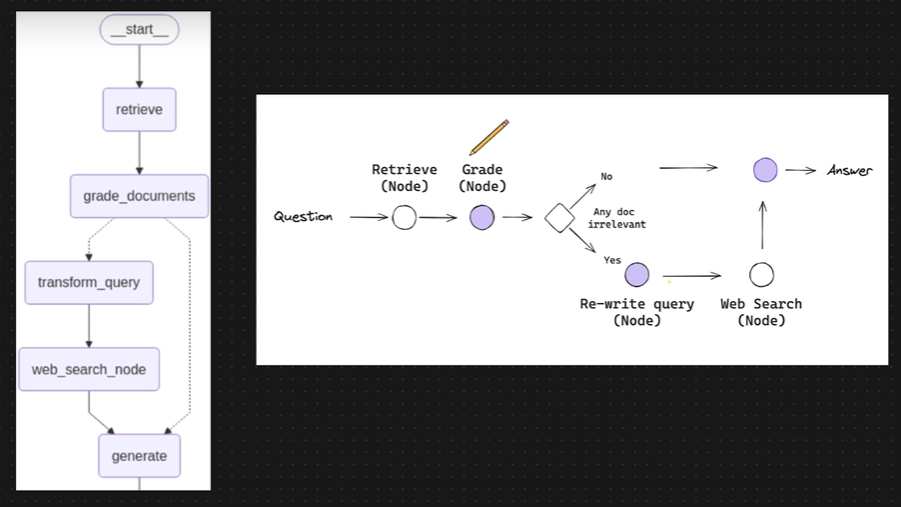

In [34]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ['GROQ_API_KEY']=os.getenv('GROQ_API_KEY')

In [37]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings

embeddings=HuggingFaceEmbeddings(model_name='all-MiniLM-L6-v2')

c:\Users\srish\anaconda3\envs\p1env\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\srish\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back 

In [38]:
urls=[
    'https://lilianweng.github.io/posts/2023-06-23-agent/',
    'https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/',
    'https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/',
]

docs=[WebBaseLoader(url).load() for url in urls]
doc_list=[item for sublist in docs for item in sublist]

text_splitter=RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=500,chunk_overlap=0)
doc_split=text_splitter.split_documents(doc_list)

vectorstore=FAISS.from_documents(doc_split,embeddings)

retriever=vectorstore.as_retriever()

In [39]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq
from pydantic import BaseModel, Field

class GradeDoc(BaseModel):
    """Binary score for relevance check on retrieved documents."""
    binary_score:str=Field(description="Documents are relevant to the question, 'yes' or 'no'")

groq_llm=ChatGroq(model='llama-3.1-8b-instant',temperature=0)

In [42]:
llm_structure=groq_llm.with_structured_output(GradeDoc)

system="""You are a grader assessing relevance of a retrived document to a user question.\n
        If the document contains keywords or semantic meaning related to the user question, grade it as relevant.\n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question."""
        
grade_prompt=ChatPromptTemplate.from_messages(
    [
        ('system',system),
        ('human',"Retrieved Document:\n\n{document}\n\n User question: {question}"),
    ]
)

retrieval_grader=grade_prompt|llm_structure
question='agent memory'
docs=retriever.invoke(question)
doc_txt=docs[1].page_content
print(retrieval_grader.invoke({'question':question,'document':doc_txt}))

binary_score='yes'


In [43]:
from langchain import hub
from langchain_core.output_parsers import StrOutputParser

prompt=hub.pull('rlm/rag-prompt')

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

rag_chain=prompt|groq_llm|StrOutputParser()

generation=rag_chain.invoke({'context':docs,'question':question})
print(generation)

In a LLM-powered autonomous agent system, long-term memory provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval. This type of memory is used to record a comprehensive list of agents' experience in natural language.


In [47]:
system="""You a question re-writer that converts an input question to a better version that is optimized \n
for web search. Look at the input and try to reason about the unnderlying semantic intent/meaning."""

re_write_prompt=ChatPromptTemplate.from_messages(
    [
        ('system',system),
        ('human','here is the initial question:\n\n{question}\n formulate an improved question and provide only the question.')
    ]
)

question_rewriter=re_write_prompt|groq_llm|StrOutputParser()
question_rewriter.invoke({'question':question})

'What is the concept of agent memory in artificial intelligence and how does it impact decision-making processes?'

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults

web_search_tool=TavilySearchResults(k=3)

In [49]:
from typing import List
from typing_extensions import TypedDict

class GraphState(TypedDict):
    """
    Represents the state of our graph.
    
    Attributes:
        question: question
        generation: LLM generation
        web_search: whether to add search
        documents: list of documents
    """
    question: str
    generation: str
    web_search: str
    documents: List[str]

In [50]:
from langchain.schema import Document

def retrieve(state):
    """
    Retrieve documents
    
    Args:
        state (dict): the current graph state

    Returns:
        state (dict): new key added to state, documents, that contains retrieved documents
    """
    print("----retrieve----")
    question=state['question']

    documents=retriever.invoke(question)
    return {'documents':documents,'question':question}

def generate(state):
    """
    Generate answer
    
    Args:
        state (dict): the current graph state
        
    Returns:
        state (dict): new key added to state, generation, that contains LLM generation
    """
    print('----generation----')
    question=state['question']
    documents=state['documents']

    generation=rag_chain.invoke({'context':documents,'question':question})
    return {'documents':documents,'question':question,'generation':generation}

def grade_doc(state):
    """
    Determines whether the retrieved documents are relevant to the question.
    
    Args:
        state (dict): the current graph state
        
    Returns:
        state (dict): Updates documents key with only filtered relevant document
    """
    print('----check document relevance to question----')
    question=state['question']
    documents=state['documents']

    filtered_doc=[]
    web_search='No'
    for d in documents:
        score=retrieval_grader.invoke(
            {'question':question,'document':d.page_content}
        )
        grade=score.binary_score
        if grade=='yes':
            print('----grade: doc relevant')
            filtered_doc.append(d)
        else:
            print('----grade: doc not relevant')
            # web_search='Yes'
            continue
    return {'documents':filtered_doc,'question':question,'web_search':web_search}

def transform_query(state):
    """
    Transform the query to produce a better question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates question key with a re-phrased question
    """

    print("---TRANSFORM QUERY---")
    question = state["question"]
    documents = state["documents"]

    # Re-write question
    better_question = question_rewriter.invoke({"question": question})
    return {"documents": documents, "question": better_question}


def web_search(state):
    """
    Web search based on the re-phrased question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates documents key with appended web results
    """

    print("---WEB SEARCH---")
    question = state["question"]
    documents = state["documents"]

    # Web search
    docs = web_search_tool.invoke({"query": question})
    web_results = "\n".join([d["content"] for d in docs])
    web_results = Document(page_content=web_results)
    documents.append(web_results)

    return {"documents": documents, "question": question}


### Edges


def decide_to_generate(state):
    """
    Determines whether to generate an answer, or re-generate a question.

    Args:
        state (dict): The current graph state

    Returns:
        str: Binary decision for next node to call
    """

    print("---ASSESS GRADED DOCUMENTS---")
    state["question"]
    web_search = state["web_search"]
    state["documents"]

    if web_search == "Yes":
        # All documents have been filtered check_relevance
        # We will re-generate a new query
        print(
            "---DECISION: ALL DOCUMENTS ARE NOT RELEVANT TO QUESTION, TRANSFORM QUERY---"
        )
        return "transform_query"
    else:
        # We have relevant documents, so generate answer
        print("---DECISION: GENERATE---")
        return "generate"

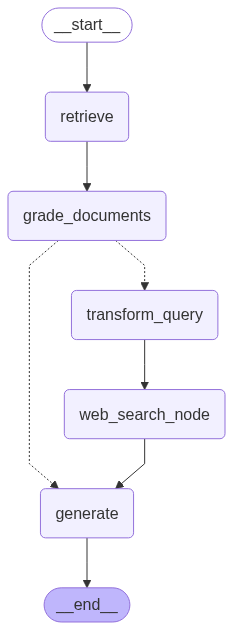

In [51]:
from langgraph.graph import END, StateGraph, START

workflow = StateGraph(GraphState)

# Define the nodes
workflow.add_node("retrieve", retrieve)  # retrieve
workflow.add_node("grade_documents", grade_doc)  # grade documents
workflow.add_node("generate", generate)  # generate
workflow.add_node("transform_query", transform_query)  # transform_query
workflow.add_node("web_search_node", web_search)  # web search

# Build graph
workflow.add_edge(START, "retrieve")
workflow.add_edge("retrieve", "grade_documents")
workflow.add_conditional_edges(
    "grade_documents",
    decide_to_generate,
    {
        "transform_query": "transform_query",
        "generate": "generate",
    },
)
workflow.add_edge("transform_query", "web_search_node")
workflow.add_edge("web_search_node", "generate")
workflow.add_edge("generate", END)

# Compile
app = workflow.compile()

from IPython.display import Image, display
display(Image(app.get_graph(xray=True).draw_mermaid_png()))

In [52]:
app.invoke({"question":"What are the types of agent memory?"})

----retrieve----
----check document relevance to question----
----grade: doc relevant
----grade: doc relevant
----grade: doc relevant
----grade: doc not relevant
---ASSESS GRADED DOCUMENTS---
---DECISION: GENERATE---
----generation----


{'question': 'What are the types of agent memory?',
 'generation': 'There are two types of agent memory mentioned in the context: \n\n1. Short-term memory: This is used for in-context learning and has a limited capacity.\n2. Long-term memory: This provides the agent with the capability to retain and recall information over extended periods, often by leveraging an external vector store and fast retrieval.',
 'web_search': 'No',
 'documents': [Document(id='bf7f20fa-6007-40dd-95df-39fe5044f217', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent 

## Adaptive RAG
- Adaptive RAG is a framework that **dynamically adjusts its strategy for handling queries based on their complexity**. 
- It's like having a smart assistant that knows when to dig deep for information and when to provide a simple answer.
- Instead of using a single and rigid approach, Adaptive RAG chooses the most approproate retrieval method for each query, balancing speed and accuracy.

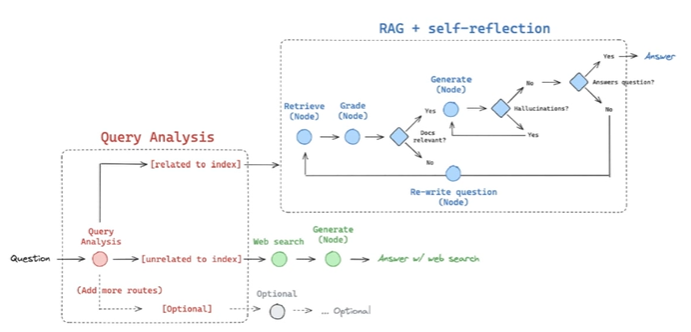

**Adaptive RAG is a strategy for RAG that unites (1) query analysis with (2) active / self-corrective RAG**

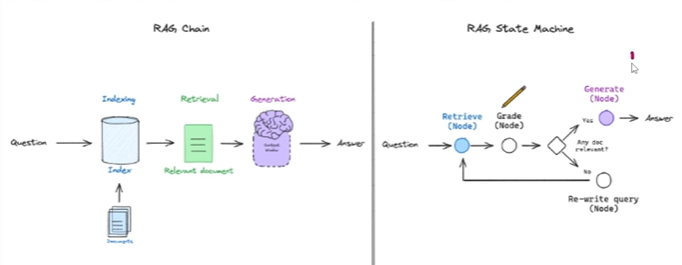

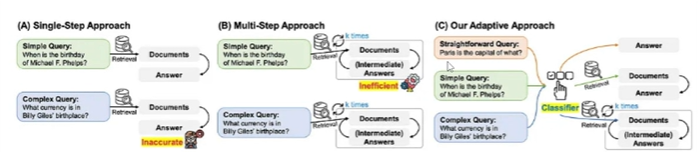

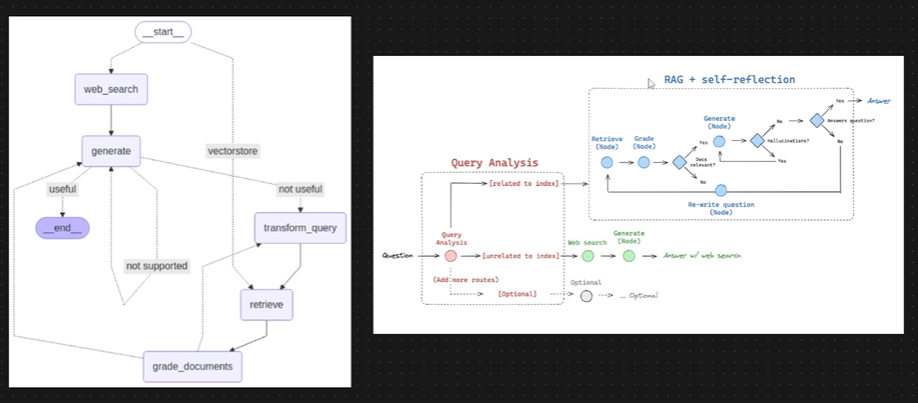

In [53]:
import os
from dotenv import load_dotenv
load_dotenv() ## aloading all the environment variable

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
# os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")

In [54]:
### Build Index

from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings

# Set embeddings
embeddings=HuggingFaceEmbeddings(model_name='all-MiniLM-L6-v2')

# Docs to index
urls = [
    "https://lilianweng.github.io/posts/2023-06-23-agent/",
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
    "https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/",
]

# Load
docs = [WebBaseLoader(url).load() for url in urls]
docs_list = [item for sublist in docs for item in sublist]

# Split
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=500, chunk_overlap=50
)
doc_splits = text_splitter.split_documents(docs_list)

# Add to vectorstore
vectorstore=FAISS.from_documents(
    documents=doc_splits,
    embedding=embeddings
)


retriever=vectorstore.as_retriever()

In [56]:
### Router

from typing import Literal

from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq

from pydantic import BaseModel, Field

# Data model
class RouteQuery(BaseModel):
    """Route a user query to the most relevant datasource."""

    datasource: Literal["vectorstore", "web_search"] = Field(
        ...,
        description="Given a user question choose to route it to web search or a vectorstore.",
    )

# LLM with function call
llm = ChatGroq(model="llama-3.1-8b-instant", temperature=0)
structured_llm_router = llm.with_structured_output(RouteQuery)

# Prompt
system = """You are an expert at routing a user question to a vectorstore or web search.
The vectorstore contains documents related to agents, prompt engineering, and adversarial attacks.
Use the vectorstore for questions on these topics. Otherwise, use web-search."""
route_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "{question}"),
    ]
)

question_router = route_prompt | structured_llm_router

print(
    question_router.invoke(
        # {"question": "Who won the Cricket world cup 2023 "}
        {"question": "agents memory "}
    )
)


datasource='vectorstore'


In [58]:
### Retrieval Grader


# Data model
class GradeDocuments(BaseModel):
    """Binary score for relevance check on retrieved documents."""

    binary_score: str = Field(
        description="Documents are relevant to the question, 'yes' or 'no'"
    )


# LLM with function call
llm = ChatGroq(model="llama-3.1-8b-instant", temperature=0)
structured_llm_grader = llm.with_structured_output(GradeDocuments)

# Prompt
system = """You are a grader assessing relevance of a retrieved document to a user question. \n 
    If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
    It does not need to be a stringent test. The goal is to filter out erroneous retrievals. \n
    Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question."""
grade_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "Retrieved document: \n\n {document} \n\n User question: {question}"),
    ]
)

retrieval_grader = grade_prompt | structured_llm_grader
question = "agent memory"
## context
docs = retriever.invoke(question)
doc_txt = docs[1].page_content
print(retrieval_grader.invoke({"question": question, "document": doc_txt}))

binary_score='no'


In [59]:
### Generate

from langchain import hub
from langchain_core.output_parsers import StrOutputParser

# Prompt
prompt = hub.pull("rlm/rag-prompt")

# LLM
# llm = ChatOpenAI(model_name="gpt-4o-mini", temperature=0)
llm = ChatGroq(model="llama-3.1-8b-instant", temperature=0)


# Post-processing
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)


# Chain
rag_chain = prompt | llm | StrOutputParser()

# Run
generation = rag_chain.invoke({"context": docs, "question": question})
print(generation)

In a LLM-powered autonomous agent system, there are two types of memory: short-term memory and long-term memory. Short-term memory utilizes in-context learning, while long-term memory provides the agent with the capability to retain and recall information over extended periods, often by leveraging an external vector store and fast retrieval.


In [60]:
### Hallucination Grader


# Data model
class GradeHallucinations(BaseModel):
    """Binary score for hallucination present in generation answer."""

    binary_score: str = Field(
        description="Answer is grounded in the facts, 'yes' or 'no'"
    )


# LLM with function call
llm = ChatGroq(model="llama-3.1-8b-instant", temperature=0)
structured_llm_grader = llm.with_structured_output(GradeHallucinations)

# Prompt
system = """You are a grader assessing whether an LLM generation is grounded in / supported by a set of retrieved facts. \n 
     Give a binary score 'yes' or 'no'. 'Yes' means that the answer is grounded in / supported by the set of facts."""
hallucination_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "Set of facts: \n\n {documents} \n\n LLM generation: {generation}"),
    ]
)

hallucination_grader = hallucination_prompt | structured_llm_grader
hallucination_grader.invoke({"documents": docs, "generation": generation})

GradeHallucinations(binary_score='yes')

In [61]:
### Answer Grader


# Data model
class GradeAnswer(BaseModel):
    """Binary score to assess answer addresses question."""

    binary_score: str = Field(
        description="Answer addresses the question, 'yes' or 'no'"
    )


# LLM with function call
llm = ChatGroq(model="llama-3.1-8b-instant", temperature=0)
structured_llm_grader = llm.with_structured_output(GradeAnswer)

# Prompt
system = """You are a grader assessing whether an answer addresses / resolves a question \n 
     Give a binary score 'yes' or 'no'. Yes' means that the answer resolves the question."""
answer_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "User question: \n\n {question} \n\n LLM generation: {generation}"),
    ]
)

answer_grader = answer_prompt | structured_llm_grader
answer_grader.invoke({"question": question, "generation": generation})

GradeAnswer(binary_score='yes')

In [62]:
### Question Re-writer

# LLM
llm = ChatGroq(model="llama-3.1-8b-instant", temperature=0)

# Prompt
system = """You a question re-writer that converts an input question to a better version that is optimized \n 
     for vectorstore retrieval. Look at the input and try to reason about the underlying semantic intent / meaning."""
re_write_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        (
            "human",
            "Here is the initial question: \n\n {question} \n Formulate an improved question.",
        ),
    ]
)

question_rewriter = re_write_prompt | llm | StrOutputParser()
question_rewriter.invoke({"question": question})

'To optimize the question for vectorstore retrieval, I\'ll rephrase it to make it more specific and semantically rich. Here\'s an improved version:\n\n"Agent\'s cognitive abilities or knowledge storage capacity"\n\nThis rephrased question includes the following improvements:\n\n1. **Added specificity**: Instead of just "agent memory", I\'ve added "cognitive abilities" and "knowledge storage capacity" to make the question more precise.\n2. **Used more descriptive terms**: I\'ve replaced "memory" with "cognitive abilities" and "knowledge storage capacity" to capture the underlying semantic intent of the original question.\n3. **Improved query structure**: The rephrased question is more structured and easier to understand, which can lead to better vectorstore retrieval results.\n\nBy rephrasing the question in this way, we can expect the vectorstore to return more relevant and accurate results, as it will be able to better understand the underlying semantic intent of the query.'

In [ ]:
### Search

from langchain_community.tools.tavily_search import TavilySearchResults

web_search_tool = TavilySearchResults(k=3)

In [63]:
from typing import List

from typing_extensions import TypedDict


class GraphState(TypedDict):
    """
    Represents the state of our graph.

    Attributes:
        question: question
        generation: LLM generation
        documents: list of documents
    """

    question: str
    generation: str
    documents: List[str]

In [64]:
from langchain.schema import Document


def retrieve(state):
    """
    Retrieve documents

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, documents, that contains retrieved documents
    """
    print("---RETRIEVE---")
    question = state["question"]

    # Retrieval
    documents = retriever.invoke(question)
    return {"documents": documents, "question": question}


def generate(state):
    """
    Generate answer

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, generation, that contains LLM generation
    """
    print("---GENERATE---")
    question = state["question"]
    documents = state["documents"]

    # RAG generation
    generation = rag_chain.invoke({"context": documents, "question": question})
    return {"documents": documents, "question": question, "generation": generation}


def grade_documents(state):
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates documents key with only filtered relevant documents
    """

    print("---CHECK DOCUMENT RELEVANCE TO QUESTION---")
    question = state["question"]
    documents = state["documents"]

    # Score each doc
    filtered_docs = []
    for d in documents:
        score = retrieval_grader.invoke(
            {"question": question, "document": d.page_content}
        )
        grade = score.binary_score
        if grade == "yes":
            print("---GRADE: DOCUMENT RELEVANT---")
            filtered_docs.append(d)
        else:
            print("---GRADE: DOCUMENT NOT RELEVANT---")
            continue
    return {"documents": filtered_docs, "question": question}


def transform_query(state):
    """
    Transform the query to produce a better question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates question key with a re-phrased question
    """

    print("---TRANSFORM QUERY---")
    question = state["question"]
    documents = state["documents"]

    # Re-write question
    better_question = question_rewriter.invoke({"question": question})
    return {"documents": documents, "question": better_question}


def web_search(state):
    """
    Web search based on the re-phrased question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates documents key with appended web results
    """

    print("---WEB SEARCH---")
    question = state["question"]

    # Web search
    docs = web_search_tool.invoke({"query": question})
    web_results = "\n".join([d["content"] for d in docs])
    web_results = Document(page_content=web_results)

    return {"documents": web_results, "question": question}


### Edges ###


def route_question(state):
    """
    Route question to web search or RAG.

    Args:
        state (dict): The current graph state

    Returns:
        str: Next node to call
    """

    print("---ROUTE QUESTION---")
    question = state["question"]
    source = question_router.invoke({"question": question})
    if source.datasource == "web_search":
        print("---ROUTE QUESTION TO WEB SEARCH---")
        return "web_search"
    elif source.datasource == "vectorstore":
        print("---ROUTE QUESTION TO RAG---")
        return "vectorstore"


def decide_to_generate(state):
    """
    Determines whether to generate an answer, or re-generate a question.

    Args:
        state (dict): The current graph state

    Returns:
        str: Binary decision for next node to call
    """

    print("---ASSESS GRADED DOCUMENTS---")
    state["question"]
    filtered_documents = state["documents"]

    if not filtered_documents:
        # All documents have been filtered check_relevance
        # We will re-generate a new query
        print(
            "---DECISION: ALL DOCUMENTS ARE NOT RELEVANT TO QUESTION, TRANSFORM QUERY---"
        )
        return "transform_query"
    else:
        # We have relevant documents, so generate answer
        print("---DECISION: GENERATE---")
        return "generate"


def grade_generation_v_documents_and_question(state):
    """
    Determines whether the generation is grounded in the document and answers question.

    Args:
        state (dict): The current graph state

    Returns:
        str: Decision for next node to call
    """

    print("---CHECK HALLUCINATIONS---")
    question = state["question"]
    documents = state["documents"]
    generation = state["generation"]

    score = hallucination_grader.invoke(
        {"documents": documents, "generation": generation}
    )
    grade = score.binary_score

    # Check hallucination
    if grade == "yes":
        print("---DECISION: GENERATION IS GROUNDED IN DOCUMENTS---")
        # Check question-answering
        print("---GRADE GENERATION vs QUESTION---")
        score = answer_grader.invoke({"question": question, "generation": generation})
        grade = score.binary_score
        if grade == "yes":
            print("---DECISION: GENERATION ADDRESSES QUESTION---")
            return "useful"
        else:
            print("---DECISION: GENERATION DOES NOT ADDRESS QUESTION---")
            return "not useful"
    else:
        print("---DECISION: GENERATION IS NOT GROUNDED IN DOCUMENTS, RE-TRY---")
        return "not supported"

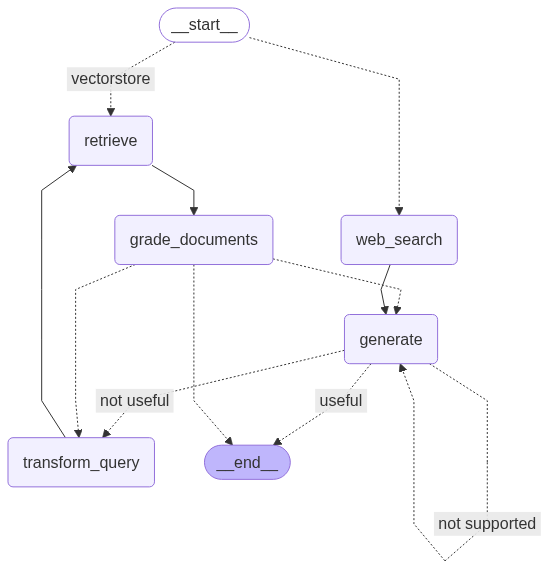

In [66]:
from langgraph.graph import END, StateGraph, START
from IPython.display import display,Image

workflow = StateGraph(GraphState)

# Define the nodes
workflow.add_node("web_search", web_search)  # web search
workflow.add_node("retrieve", retrieve)  # retrieve
workflow.add_node("grade_documents", grade_documents)  # grade documents
workflow.add_node("generate", generate)  # generate
workflow.add_node("transform_query", transform_query)  # transform_query

# Build graph
workflow.add_conditional_edges(
    START,
    route_question,
    {
        "web_search": "web_search",
        "vectorstore": "retrieve",
    },
)
workflow.add_edge("web_search", "generate")
workflow.add_edge("retrieve", "grade_documents")
workflow.add_conditional_edges(
    "grade_documents",
    decide_to_generate,
    {
        "transform_query": "transform_query",
        "generate": "generate",
    },
)
workflow.add_edge("transform_query", "retrieve")
workflow.add_conditional_edges(
    "generate",
    grade_generation_v_documents_and_question,
    {
        "not supported": "generate",
        "useful": END,
        "not useful": "transform_query",
    },
)

# Compile
app = workflow.compile()

display(Image(app.get_graph().draw_mermaid_png()))

In [67]:
app.invoke({"question":"What is agent memory"})

---ROUTE QUESTION---
---ROUTE QUESTION TO RAG---
---RETRIEVE---
---CHECK DOCUMENT RELEVANCE TO QUESTION---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---ASSESS GRADED DOCUMENTS---
---DECISION: GENERATE---
---GENERATE---
---CHECK HALLUCINATIONS---
---DECISION: GENERATION IS GROUNDED IN DOCUMENTS---
---GRADE GENERATION vs QUESTION---
---DECISION: GENERATION ADDRESSES QUESTION---


{'question': 'What is agent memory',
 'generation': 'Agent memory refers to the component of a LLM-powered autonomous agent system that enables the agent to retain and recall information over extended periods. It is often achieved through leveraging an external vector store and fast retrieval.',
 'documents': [Document(id='14140010-b221-4fad-a5cb-8ce40a13e4f2', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components: